In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from ggplot import *
import seaborn as sns

### Read the dataset

In [2]:
data = pd.read_csv("Train.csv",)

In [3]:
cols = data.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
data.columns = cols

In [4]:
data.columns = ['Collision_Reference_No','Policing_Area','Collision_Severity','Weekday_of_Collision','Day_of_Collision',
                   'Month_of_Collision','Hour_of_Collision','Carriageway_Type',
                   'Speed_Limit','Junction_Detail','Junction_Control','ped_Junction_Detail','ped_Physical_Control',
                   'Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site'
                   ]

###### Data Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 17 columns):
Collision_Reference_No        10397 non-null int64
Policing_Area                 10054 non-null object
Collision_Severity            10397 non-null int64
Weekday_of_Collision          10397 non-null object
Day_of_Collision              10397 non-null int64
Month_of_Collision            10397 non-null int64
Hour_of_Collision             10091 non-null float64
Carriageway_Type              10397 non-null int64
Speed_Limit                   10397 non-null int64
Junction_Detail               10089 non-null float64
Junction_Control              10087 non-null float64
ped_Junction_Detail           10066 non-null float64
ped_Physical_Control          10088 non-null float64
Light_Conditions              10397 non-null int64
Weather_Conditions            10397 non-null int64
Road_Surface_Conditions       10080 non-null float64
Special_Conditions_at_Site    10095 non-null float64
dtypes: 

In [5]:
data.head()

,Collision Reference No.,Policing Area,Collision Severity,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing – Human Control,Pedestrian Crossing – Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


checking missing values

In [6]:
data.isnull().sum()

Collision Reference No.                     0
Policing Area                             343
Collision Severity                          0
Weekday of Collision                        0
Day of Collision                            0
Month of Collision                          0
Hour of Collision (24 hour)               306
Carriageway Type                            0
Speed Limit                                 0
Junction Detail                           308
Junction Control                          310
Pedestrian Crossing – Human Control       331
Pedestrian Crossing – Physical Control    309
Light Conditions                            0
Weather Conditions                          0
Road Surface Conditions                   317
Special Conditions at Site                302
dtype: int64

# Collision description anlaysis using visualization

In [6]:
%matplotlib notebook

 

# Collissions on each month of the year

* check the collissions happening on each month, it seems like the accidents are happening more on the month of november and december

<IPython.core.display.Javascript object>


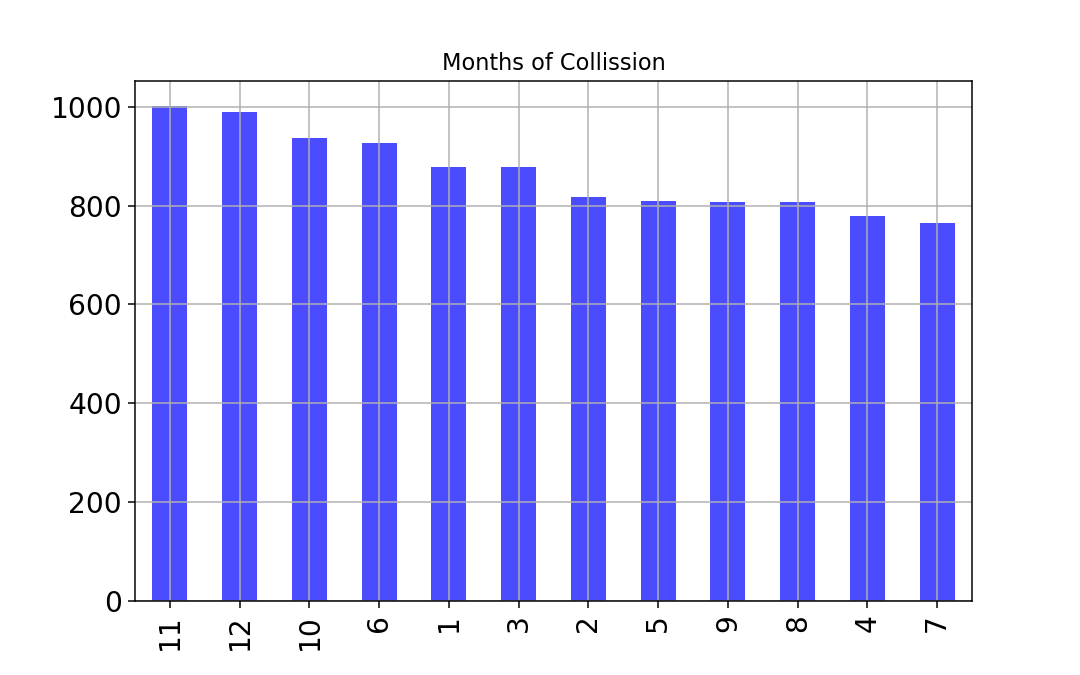

In [7]:
plt.figure()
data.Month_of_Collision.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Months of Collission')
plt.grid()
plt.show()

# Collissions on each day of the months

it seems like accidents are happening less on end of the month

<IPython.core.display.Javascript object>


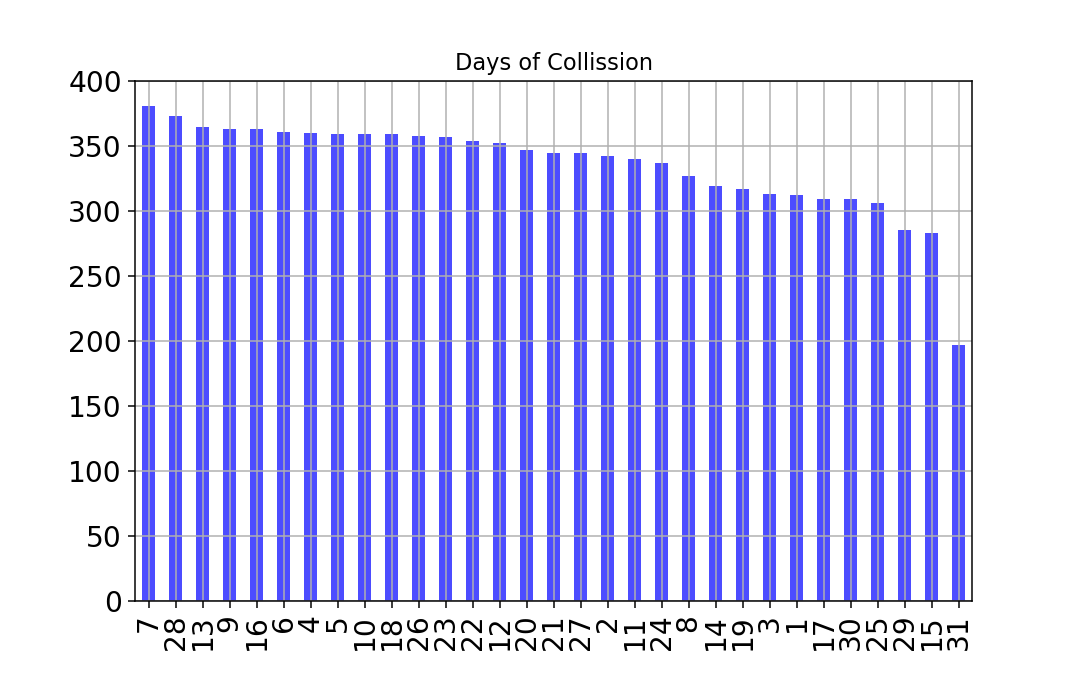

In [8]:
plt.figure()
data.Day_of_Collision.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Days of Collission')
plt.grid()
plt.show()

# collission during the days of the week

# It is interprested that accidents are happneing less on sunday

<IPython.core.display.Javascript object>


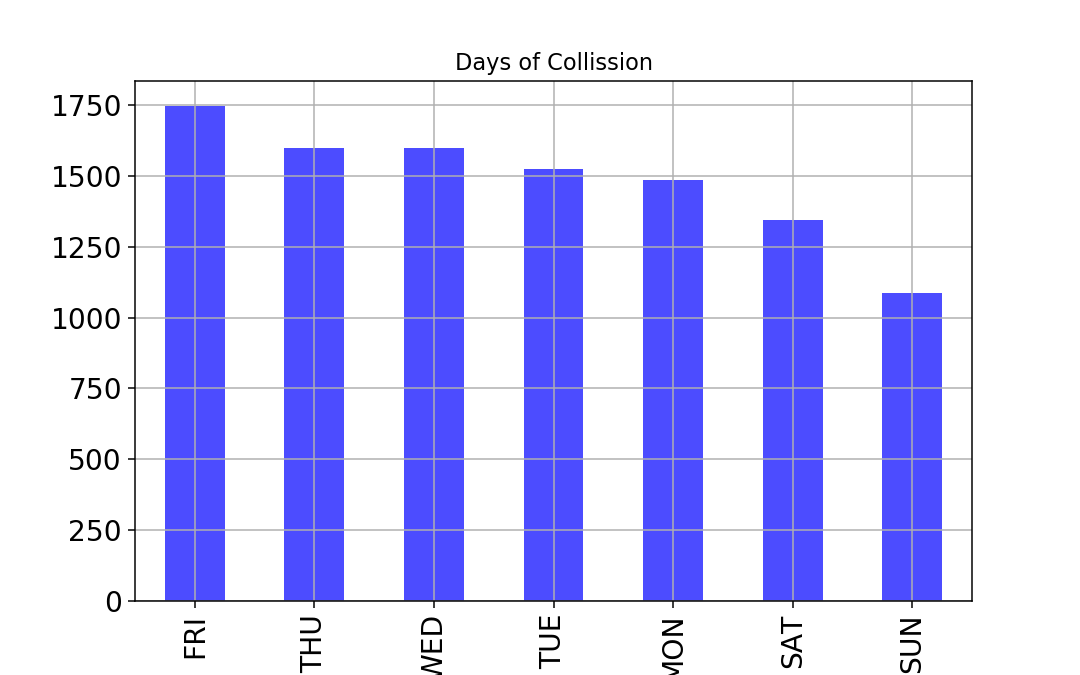

In [9]:
plt.figure()
data.Weekday_of_Collision.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Days of Collission')
plt.grid()
plt.show()

# collission during the Weather Consitions

It seems like most of the collissions are happening on 1 :  Fine without high winds
2 :  Raining without high winds

<IPython.core.display.Javascript object>


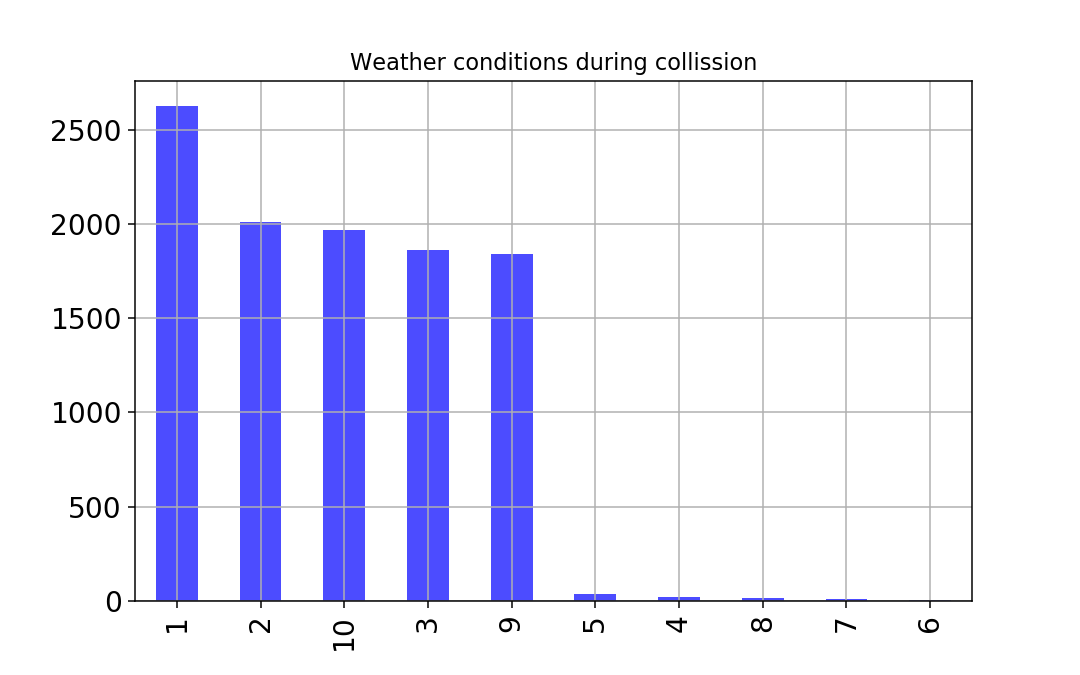

In [10]:
plt.figure()
data.Weather_Conditions.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Weather conditions during collission')
plt.grid()
plt.show()

# Policing Area of collissions

1) It is understood that most of the collissions happened at the Belfast City only and
2) it is followed by the Armagh City, Banbridge & Craigavon area

<IPython.core.display.Javascript object>


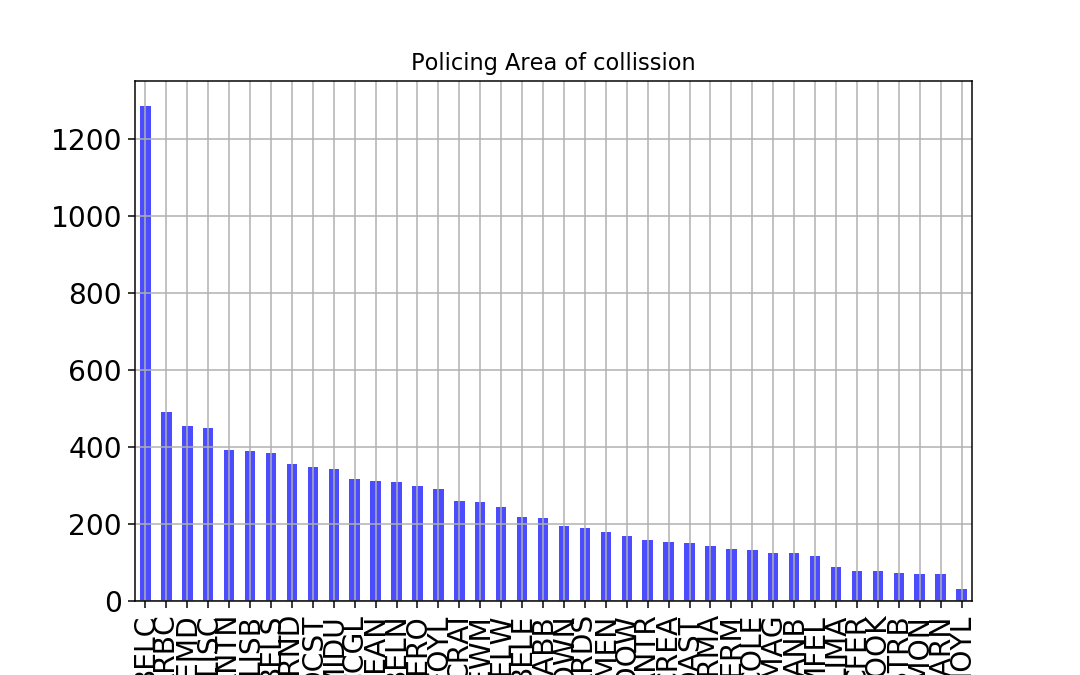

In [11]:
plt.figure()
data.Policing_Area.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Policing Area of collission')
plt.grid()
plt.show()

### Junction detail and Control Combination

In [12]:
jun_det_control= data.groupby(['Junction_Detail','Junction_Control']).size()

In [13]:
jun_det_control

Junction_Detail  Junction_Control
1.0              1.0                 4061
                 7.0                    9
2.0              3.0                    4
                 7.0                  302
3.0              7.0                   39
6.0              1.0                   21
                 3.0                  137
                 4.0                  124
                 7.0                  222
8.0              3.0                  130
                 4.0                    3
                 7.0                   78
9.0              3.0                    4
                 7.0                  135
10.0             3.0                   18
                 7.0                 1173
12.0             3.0                  264
                 4.0                  197
                 7.0                 2867
dtype: int64

In [14]:
jun_det_control = jun_det_control.unstack()

# comparison between junction detail and control

<IPython.core.display.Javascript object>


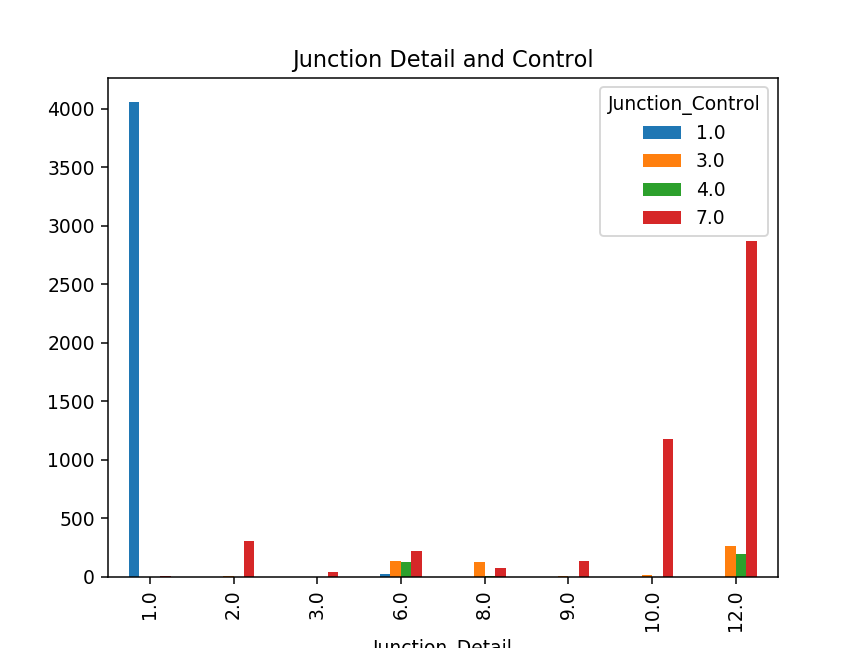

In [15]:
jun_det_control.plot(kind = 'bar')
plt.title('Junction Detail and Control')
#plt.xticks(['1-e','20f','3d','3g','4g','3v','0f','9f'],[],rotation = 0)
plt.show()


actions to be taken:,
1) It is interpreted that most of the collission happened at T or staggered junction which contain (Give way or uncontrolled detail) controls,
2) Also most of the collision happened during Not a junction  (Not a junction controls)

## WeekDay of Collission vs Hours of Collission

<IPython.core.display.Javascript object>


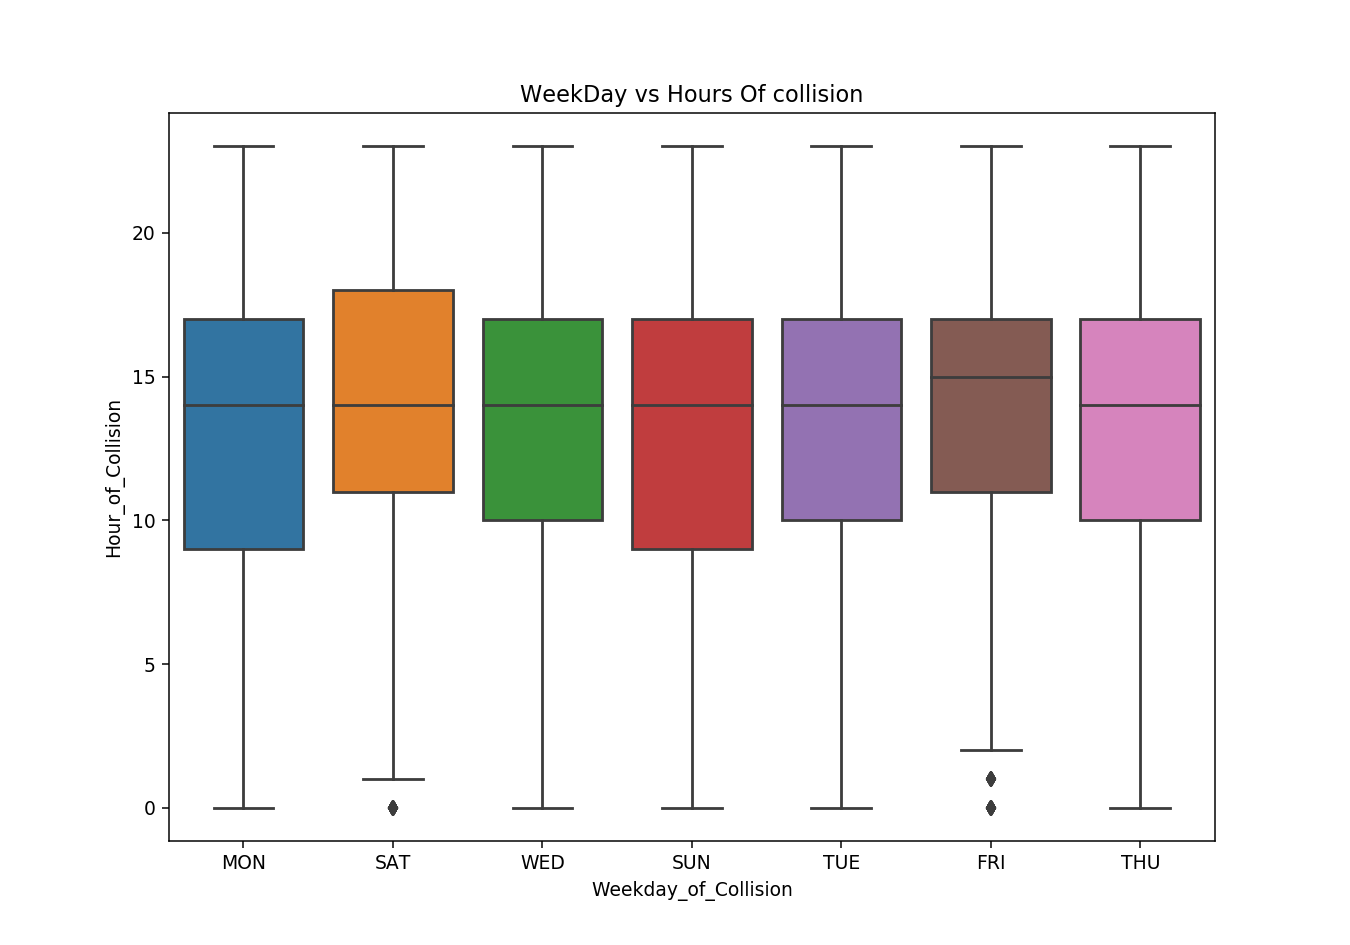

In [16]:
plt.figure(figsize = (10,7))
sns.boxplot(data.Weekday_of_Collision,data.Hour_of_Collision).set_title('WeekDay vs Hours Of collision')
plt.show()

1) It is interpreted that most of the collissions happened between 09 hrs and 16hrs
2) On Friday,Satyrday, Wednesday BoxPlot look somewhat thinner

### Let us bin the Speed Limit column

this is to identify that the speed limit has any impact on the type of road surface

it seems like most of the accidents are happening on the 20-40,40-60 with dry road in top and wet road in secound

In [17]:
data['speed_Bins']=(np.digitize(data.Speed_Limit,[0,20,40,60,80],right=True))

In [18]:
speed_lit_road_surface = data.groupby(['speed_Bins','Road_Surface_Conditions']).size().unstack().reset_index().set_index('speed_Bins')

<IPython.core.display.Javascript object>


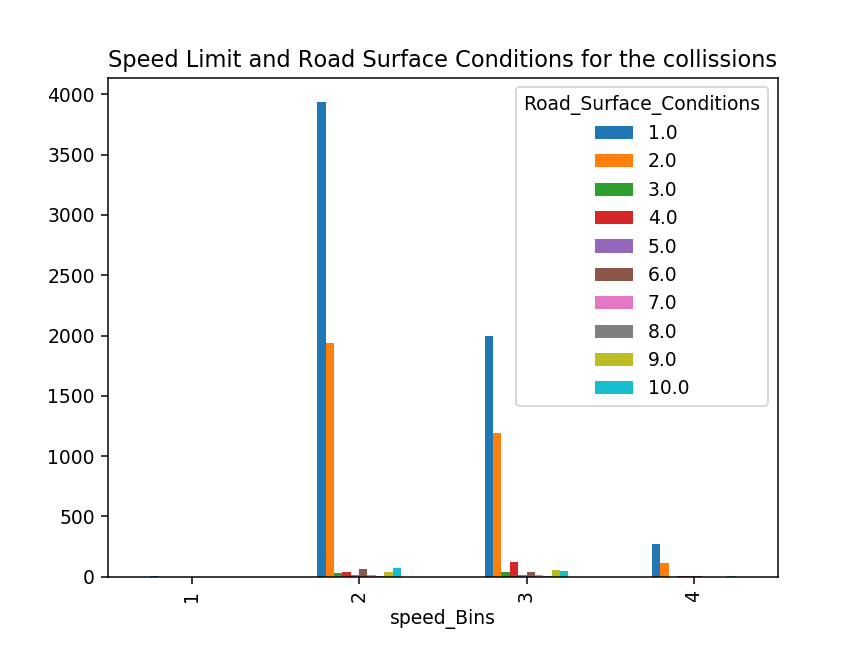

In [19]:
speed_lit_road_surface.plot(kind= 'bar',title = 'Speed Limit and Road Surface Conditions for the collissions')
#plt.xticks([0,1,2],[''],rotation = 0)
plt.show()

In [20]:
pol_area_lit_cond = data.groupby(['Policing_Area','Light_Conditions']).size().unstack().reset_index().set_index('Policing_Area')

# Policing Area and Light Conditions

<IPython.core.display.Javascript object>


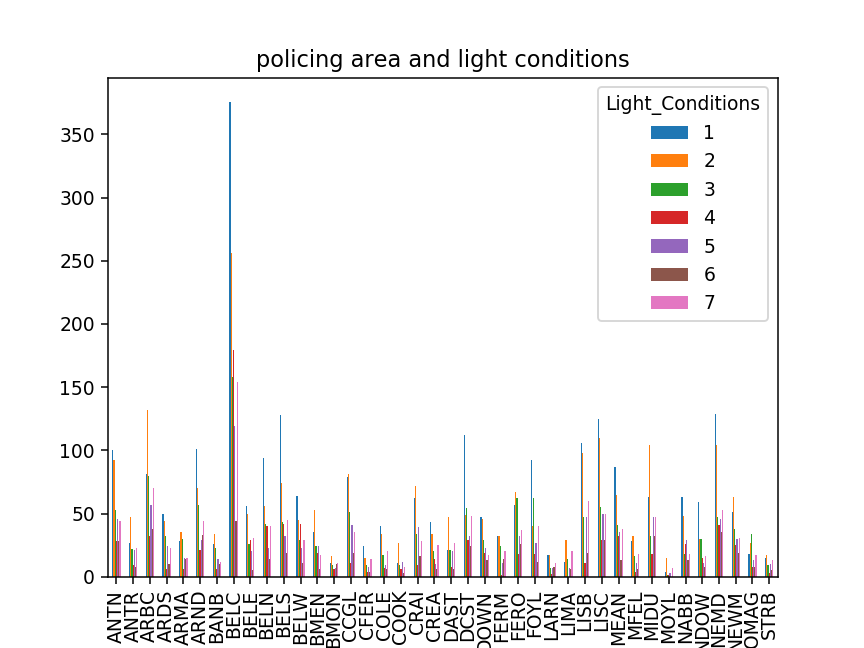

In [21]:
pol_area_lit_cond.plot(kind= 'bar',title = 'policing area and light conditions')
#plt.xticks([0,1,2],[''],rotation = 0)
plt.show()

# Combination of Policing area and Carriage Way 

#this is to identify whether the carriage way has any impact on the policiy area

#if you observe most of the accidents are happend on the single carriageway

In [22]:
pol_area_carg_area = data.groupby(['Carriageway_Type','Policing_Area']).size().unstack().reset_index().set_index('Carriageway_Type')

<IPython.core.display.Javascript object>


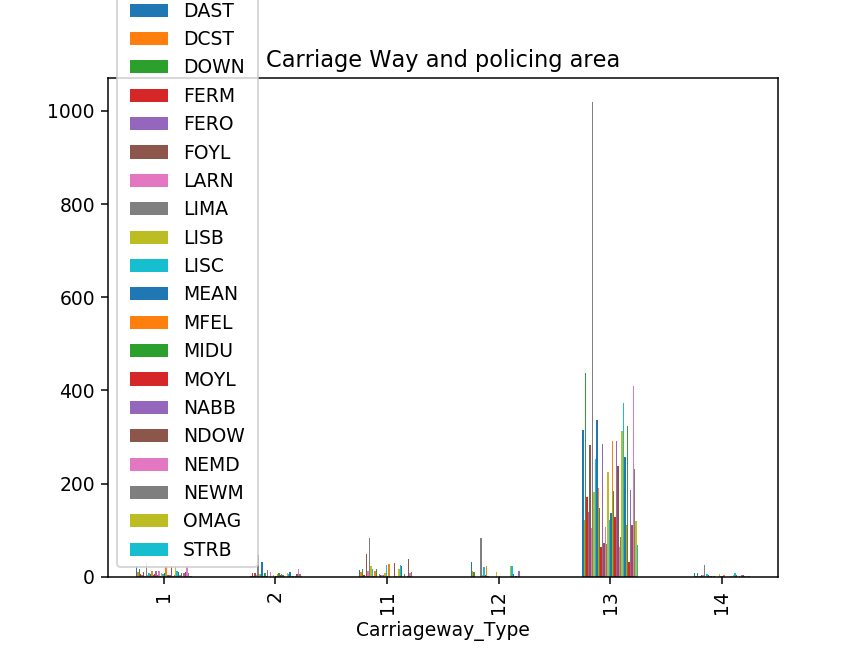

In [23]:
pol_area_carg_area.plot(kind= 'bar',title = 'Carriage Way and policing area')
#plt.xticks([0,1,2],[''],rotation = 0)
plt.show()

# collision severity based on light condition

most of the time severe collisoin happen on the light conditions happening on #1 :  Daylight : street lights present
2 :  Daylight : no street lighting
3 :  Daylight : street lighting unknown


In [29]:
col_serv_lit_cond = data.groupby(['Light_Conditions','Collision_Severity']).size().unstack().reset_index().set_index('Light_Conditions')

<IPython.core.display.Javascript object>


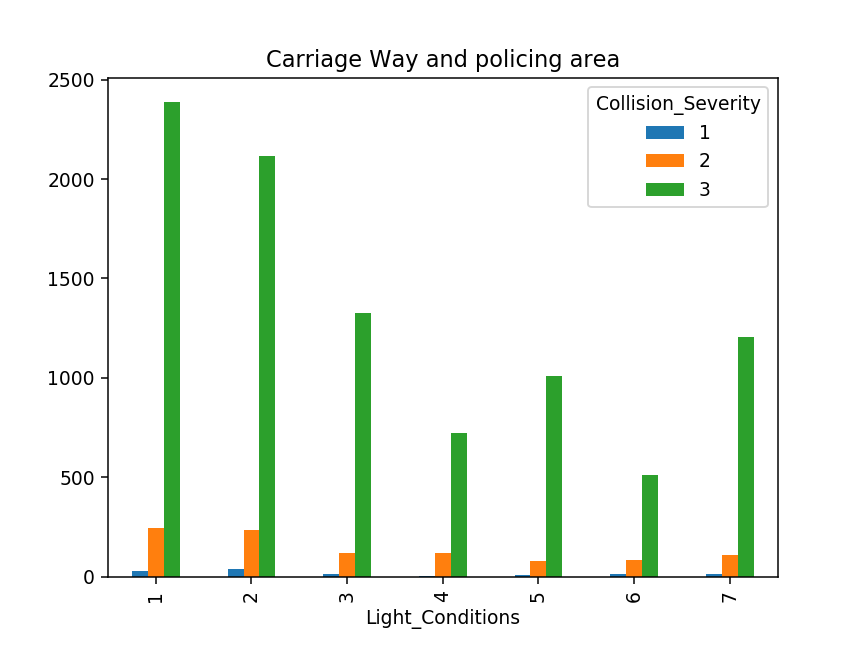

In [30]:
col_serv_lit_cond.plot(kind= 'bar',title = 'Carriage Way and policing area')
#plt.xticks([0,1,2],[''],rotation = 0)
plt.show()

## Hours of collison and Speed limits during that collissions

<IPython.core.display.Javascript object>


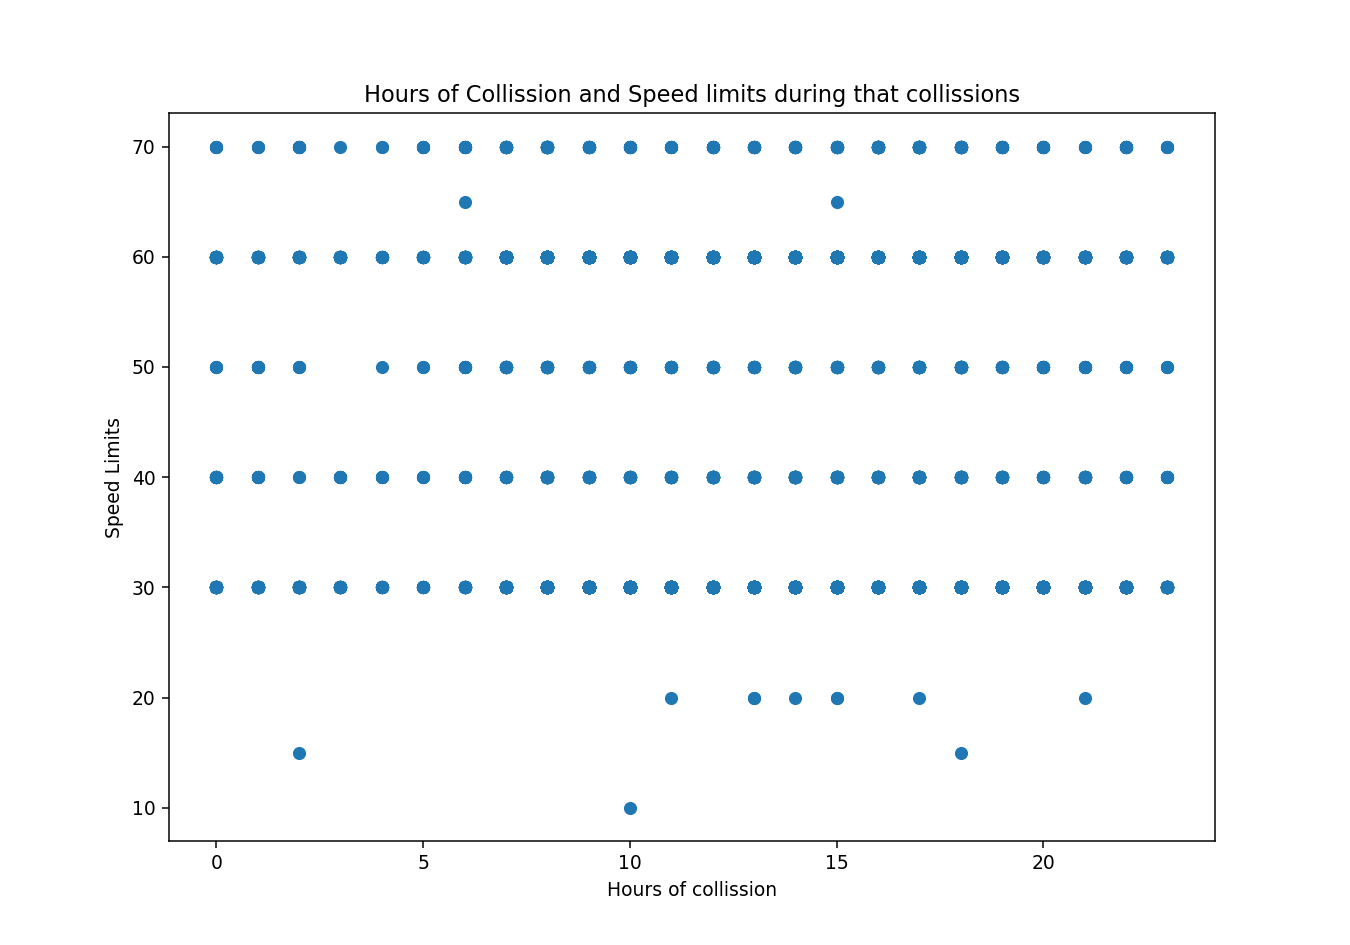

In [24]:
plt.figure(figsize = (10,7))

plt.scatter(x = data.Hour_of_Collision,y = data.Speed_Limit)
plt.title('Hours of Collission and Speed limits during that collissions')
plt.xlabel('Hours of collission')
plt.ylabel('Speed Limits')
plt.show()


### Histogram of Speed Limit

It seems like most of the collission happened due to over speed at very less speed limit 30kmph

<IPython.core.display.Javascript object>


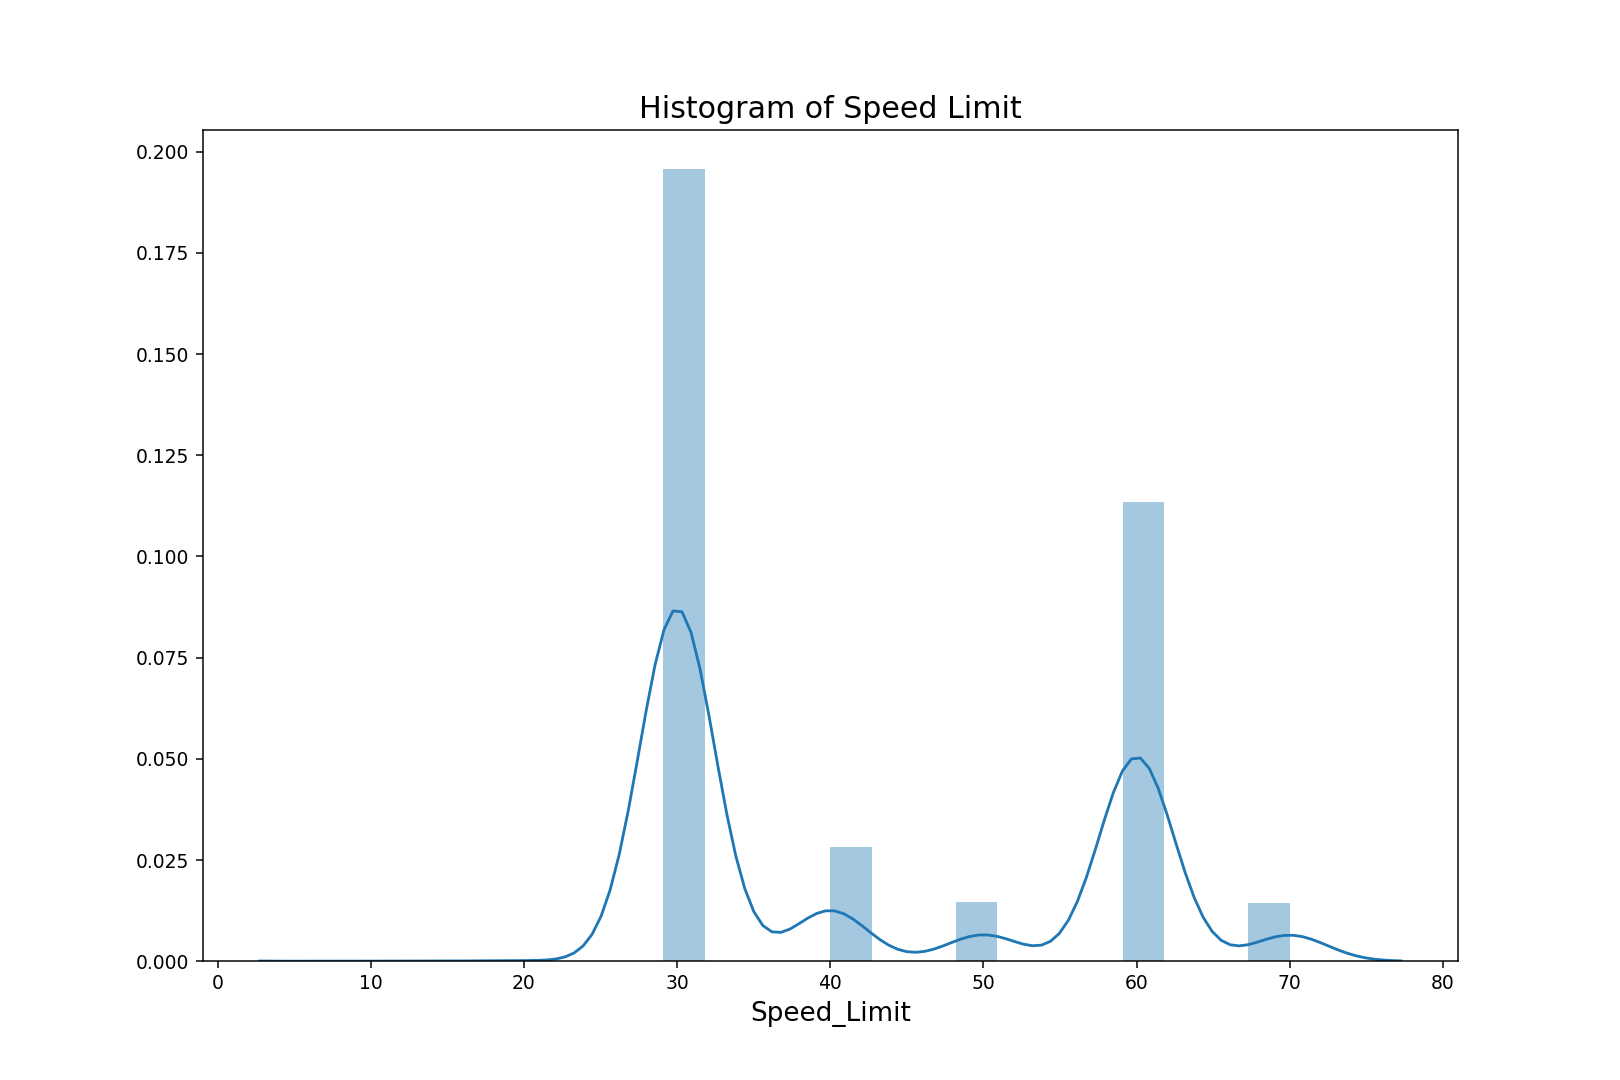

In [26]:
plt.figure(figsize = (12,8))
b = sns.distplot(data.Speed_Limit)
b.set_title('Histogram of Speed Limit',fontsize = 16)
b.set_xlabel("Speed_Limit",fontsize=14)
plt.show()

# FacetGrid for Physical Control and Speed Limit

<IPython.core.display.Javascript object>


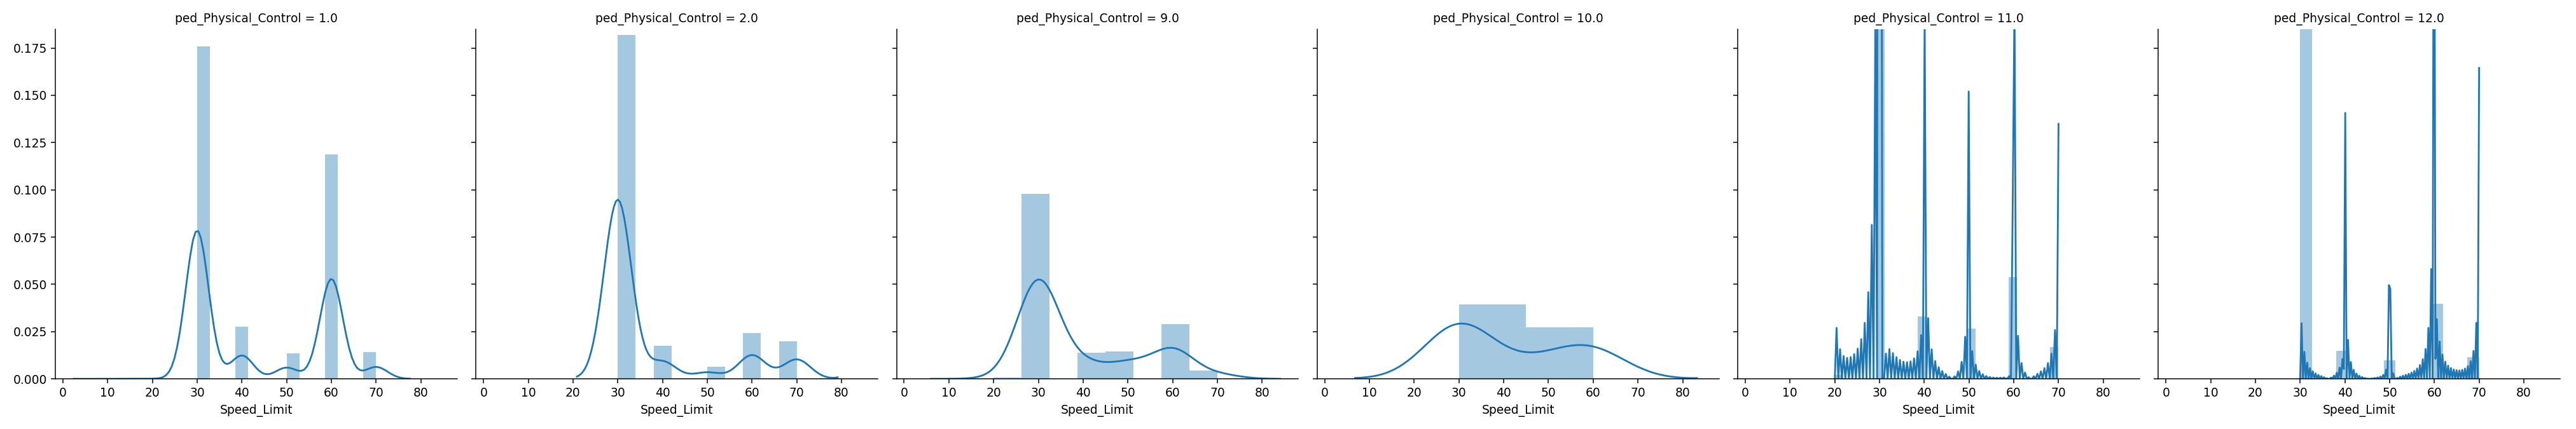

In [73]:
g = sns.FacetGrid(data,col='ped_Physical_Control',size = 5)
g.map(sns.distplot,'Speed_Limit')
plt.show()

# hours of collision for each week day

it seems like the collision is equally distribtue on all the week days

<IPython.core.display.Javascript object>


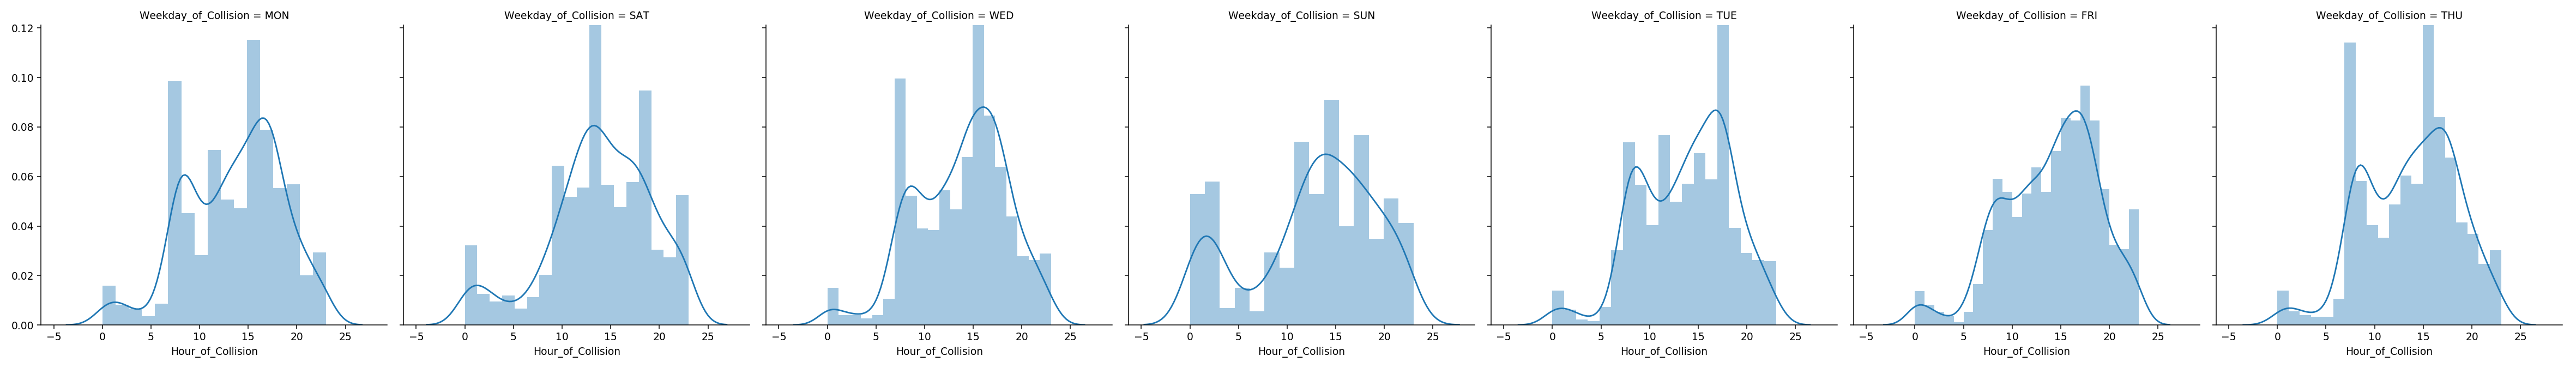

In [27]:
g = sns.FacetGrid(data,col='Weekday_of_Collision',size = 5)
g.map(sns.distplot,'Hour_of_Collision')
plt.show()

it seems like most of the collisions are happening on 11 :  Pedestrian phase at traffic signal junction
12 :  Non junction pedestrian light crossing phyical controls on the range of 30-70 speed limits